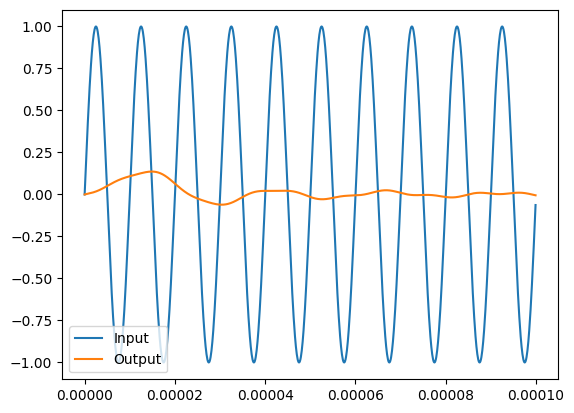

In [30]:
import numpy as np
from scipy.signal import ellip, lsim
import matplotlib.pyplot as plt

def AntiAliasFilter(cut_frec, Aa, Ap, signal, t): 
    '''Apply a 4th Order low-pass Cauer filter with fc = cut_frec to the input signal. 
    
    Ap is the maximun attenuation in the passband and Aa is the minimun attenuation in the stopband 
    '''
    a,b = ellip(4, Ap, Aa, 2*np.pi*cut_frec, 'low', analog=True, output='ba') #Cauer Filter 4th order
    tout, yout, xout = lsim((a,b), signal, t) #Apply the filter to the signal
    return yout


fo = 100000 #Hz
t = np.linspace(0, 10/(fo), 1000, endpoint=False)
y = np.sin(2*np.pi*fo*t) #Input signal

#Apply the filter
yout = AntiAliasFilter(40000, 40, 1, y, t)

#plot the results
plt.plot(t, y, label='Input')
plt.plot(t, yout, label='Output')
plt.legend()

plt.show()



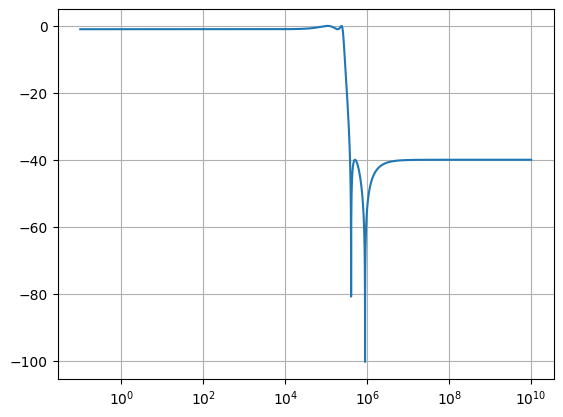

In [26]:
from scipy import signal
from scipy.signal import zpk2tf
from scipy.signal import zpk2tf, freqz

cut_frec = 40000 #Hz
Aa = 40
Ap = 1

b, a = ellip(4, Ap, Aa, 2*np.pi*cut_frec, analog=True) #Cauer Filter 4th order

w, h = signal.freqs(b, a, worN=np.logspace(-1, 10, 10000))




plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.grid()
plt.show()
